In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
%matplotlib inline

In [2]:
def read_data():
    df = pd.read_csv('./BASEVENTAS2010A2015.csv', parse_dates=['FECHA'], infer_datetime_format=True)
    df['CPRECIO'] = df[' CPRECIO '].map(lambda x: x.strip().replace(",", ""))
    df['CPRECIO'] = df['CPRECIO'].convert_objects(convert_numeric=True)
    df['COSTOPESOS'] = df[' COSTOPESOS ']
    df = df.drop([' CPRECIO ', ' COSTOPESOS '], axis=1)
    cols = df.columns.values 
    cols[-3] = "YEAR"
    df.columns = cols
    return df

def calculate_extra_cols(df):
    df['total_price'] =  df['CPRECIO'] * df['#UNIDADES'] * df['CTIPOCAM01']
    return df

In [3]:
df = read_data()
df = calculate_extra_cols(df)

/Users/Grimi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


#### Articles sold per year

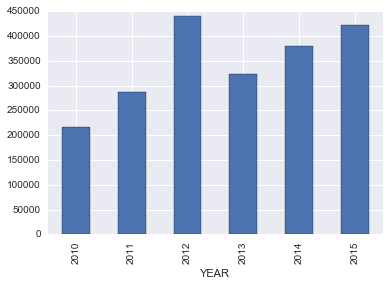

In [4]:
art_year = df.groupby('YEAR')["#UNIDADES", "total_price"].sum()
art_year['#UNIDADES'].plot(kind='bar')
# plt.xticks(range(5), ('2010', '2012', '2013', '2014', '2015'))

#### Articles sold per month across all years

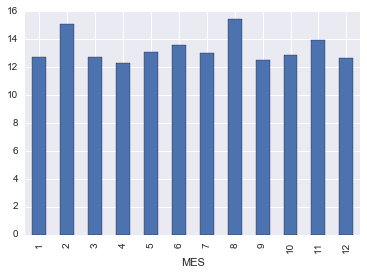

In [5]:
art_month = df.groupby('MES')["#UNIDADES"].mean()
art_month.sort_index().plot(kind='bar')

#### Articles sold per month per year

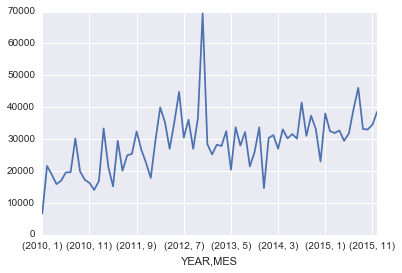

In [6]:
month_year = df.groupby(["YEAR", "MES"])['#UNIDADES'].sum()
month_year.plot()
# per = new.index.to_period("M")
# plt.bar(per.value_counts())

#### Jumping into time series

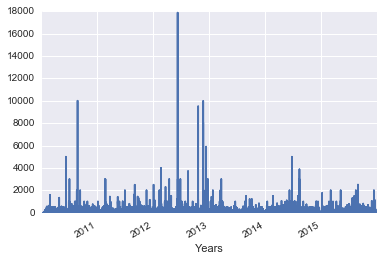

In [7]:
ts = df.set_index("FECHA")[["#UNIDADES", "total_price"]]
ts = ts[~ts["total_price"].isnull()]
ts["total_price"] /= 100.0
ts = ts.sort_index()
axes = ts["#UNIDADES"].plot()
axes.set_xlabel("Years")

#### Lets try a transformation to the data

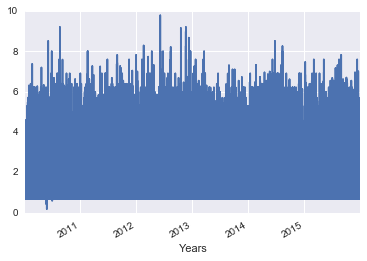

In [8]:
logts = np.log(ts["#UNIDADES"])
axes = logts[logts > 0].plot()
axes.set_xlabel("Years")

#### After resampling to the sum of months 

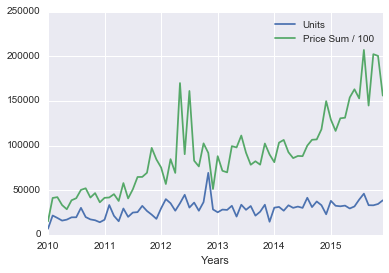

In [9]:
month_ts = ts.resample('M').sum().sort_index()
axes = month_ts.plot()
axes.set_xlabel("Years")
axes.legend(labels=["Units", "Price Sum / 100"])

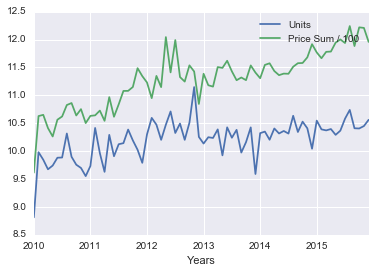

In [10]:
log_month_ts = np.log(month_ts)
axes = log_month_ts.plot()
axes.set_xlabel("Years")
axes.legend(labels=["Units", "Price Sum / 100"])